In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits
from specim.specfuncs import spec2d, spec1d, echelle2d

In [2]:
file_loc = '../galaxy_spectra/ESI_data/2018/*'

In [3]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'Feige110' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)
            #frame = p.split('_')[-3][:4]
            #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
        #print(p)

In [7]:
spec = echelle2d.Ech2d(spec2d_file_list[0], varspec=var2d_file_list[1], logwav=True)
print(spec2d_file_list[0])
print(var2d_file_list[1])

Order  Shape    Dispaxis
----- --------- --------
  0   3461x165     x
  1   4093x145     x
  2   4096x146     x
  3   4096x141     x
  4   4096x130     x
  5   4096x127     x
  6   4096x124     x
  7   4096x121     x
  8   4096x117     x
  9   4096x111     x
../galaxy_spectra/ESI_data/2018/Feige110_0026_bgsub.fits
../galaxy_spectra/ESI_data/2018/Feige110_0026_var.fits


In [9]:
sp = spec[5]

In [29]:
sp.apmin =-6
sp.apmax = 5

Profile max value (before normalization) 16046.627218


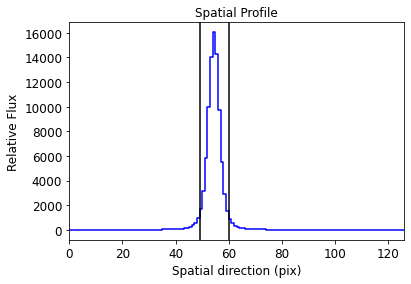

In [30]:
profile = sp.spatial_profile(pixrange=[1900, 2300])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 20

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 16000, 55, 3

amplitude=16000.000000, mu=55.000000, sigma=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=33.22489806)>

    [1]: <Gaussian1D(amplitude=12213.39118612, mean=55.26901247, stddev=2.13577365)>
Parameters:
          c0_0          amplitude_1           mean_1           stddev_1     
    ---------------- ------------------ ----------------- ------------------
    33.2248980642284 12213.391186117718 55.2690124

<CompoundModel(c0_0=33.22489806, amplitude_1=12213.39118612, mean_1=55.26901247, stddev_1=2.13577365)>

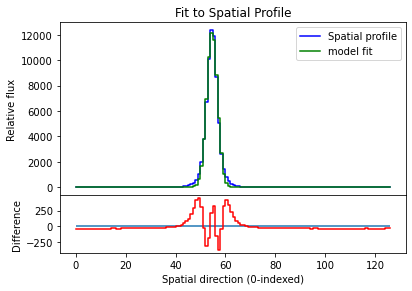

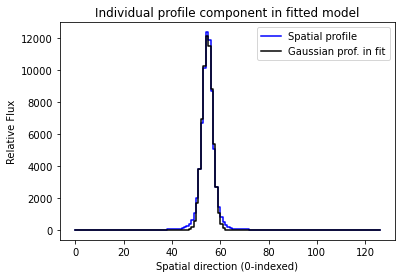

In [31]:
sp.initial_model()

Profile max value (before normalization) 10294.351443

Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-0.08280955)>

    [1]: <Gaussian1D(amplitude=8257.41041682, mean=55., stddev=3.5)>
Parameters:
            c0_0           amplitude_1    mean_1 stddev_1
    -------------------- ---------------- ------ --------
    -0.08280955376820108 8257.41041682405   55.0      3.5

-------------------------------------------


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 25 segments
  of the 2D spectrum with stepsize=163 pix ...
    Done
Fitting polynomial of degree 4 to parameter: mean_1
Fitting polynomial of degree 4 to parameter: stddev_1
Plotting centroid and width of model component 1


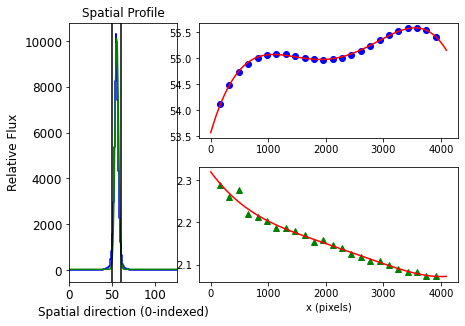

<Figure size 432x288 with 0 Axes>

In [37]:
sp.find_and_trace(sp.mod0, fitrange=[0, 4096], fitorder={'mean_1': 4, 'stddev_1': 4})

 Spectrum Start:  5810.63
 Spectrum End:     6560.55
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.23


Plotting the spectrum


<IPython.core.display.Javascript object>


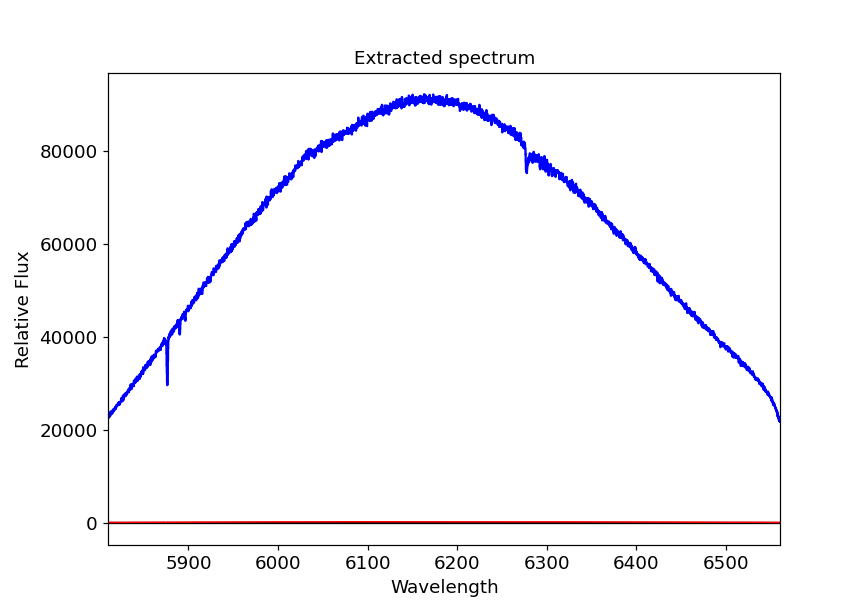

In [39]:
%matplotlib notebook
sp.extract(method='optimal', extrange=[900, 4096])

In [41]:
sp.spec1d.save('spec_optimal_method.fits', outformat='fits')

Saved spectrum to file spec_optimal_method.fits in format fits
